## Relation Cleaning

In [17]:
import pandas as pd
import numpy as np

In [31]:
kiid2rel = pd.read_excel("./outputs/relations/relations.xlsx")
kiid2rel.head()

Unnamed: 0 id_sent  confidence  \
0           0   sent0    0.894243   
1           1   sent0    0.894243   
2           2   sent0    0.702564   
3           3   sent1    0.926299   
4           4   sent1    0.877266   

                                            sentence  \
0  fund increase the value of its assets over the...   
1  fund increase the value of its assets over the...   
2  fund increase the value of its assets over the...   
3  It is actively managed and invest in securitie...   
4  It is actively managed and invest in securitie...   

                                          extraction index  argument 1  \
0  {'arg1': {'text': 'companies', 'offsets': [[11...  text   companies   
1  {'arg1': {'text': 'shares', 'offsets': [[75, 7...  text      shares   
2  {'arg1': {'text': 'fund', 'offsets': [[0, 1, 2...  text        fund   
3  {'arg1': {'text': 'the index', 'offsets': [[46...  text   the index   
4  {'arg1': {'text': 'securities', 'offsets': [[1...  text  securities   

           relation                                 0    1    2  \
0         operating                   in this country  NaN  NaN   
1            issued  by Indian companies or companies  NaN  NaN   
2          increase           the value of its assets  NaN  NaN   
3                is                 MSCI India USD NR  NaN  NaN   
4  are not included                      in the index  NaN  NaN   

                                                isin  
0  ['LU0823429740', 'LU0823429153', 'LU0823428429...  
1  ['LU0823429740', 'LU0823429153', 'LU0823428429...  
2  ['LU0823429740', 'LU0823429153', 'LU0823428429...  
3  ['LU0823429740', 'LU0823429153', 'LU0823428429...  
4  ['LU0823429740', 'LU0823429153', 'LU0823428429...

In [32]:
kiid2rel.columns = ["index", "id_sent", "confidence", "sentence", "extraction", "index", "argument 1", "relation", "argument 2", "argument 3", "argument 4", "isin"]

In [26]:
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('en')
#from stop_words import get_stop_words

#stop_words = get_stop_words('en')




In [33]:
STOPWORDS = set(stopwords.words('english'))

"""
def clean_rel(text):

    doc = nlp(text)
    
    text = text.lower() # lowercase text
    #text = ' '.join(nltk.regexp_tokenize(text, pattern))
    text = SPACE_REPLACEMENT.sub(' ', text) # replace SPACE_REPLACEMENT symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    #text = SYMBOLS.sub('', text) # remove symbols present in SYMBOLS from text. 
    #text = ' '.join(word for word in text.split()) #if word not in STOPWORDS) # remove stopwords from text
    #text = ' '.join(word for word in word_tokenize(text.lower()) if word not in STOPWORDS) # tokenize text
    #text = ''.join([lemmatizer.lemmatize(word) for word in text])
    #text = lemmatizer.lemmatize(text)
    #text = [lemmatizer.lemmatize(word) for word in text]
    
    for e in AUXILIARY:
        text = re.sub(e, "", text)

    return text
"""
def clean_entity(text):
    #text = text.lower() # lowercase text
    #for e in ARTICLE:
    text = str(text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    text = re.sub(r"((^|\s)([a|A]|[t|T]he|[t|T]hese|[t|T]his|[I|i]ts|an)(\s))", " ", str(text))
    #text = re.sub(r'^ +|^\"|\s{2,}', "", text)
    return text

#def space(text):
    #text = re.sub(r'^ +|\"|\s{2,}', "", text)
    #return text

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

def pos_tag(text):
    doc = nlp(text)
    return " ".join([token.pos_ for token in doc])

def name_entity(text):
    doc = nlp(text)
    return " ".join([ent.label_ for ent in doc.ents])

In [34]:
kiid2rel_clean = kiid2rel
kiid2rel_clean['argument 1'] = kiid2rel['argument 1'].apply(clean_entity)
kiid2rel_clean['argument 2'] = kiid2rel['argument 2'].apply(clean_entity)
kiid2rel_clean['argument 3'] = kiid2rel["argument 3"].apply(clean_entity)
kiid2rel_clean['argument 4'] = kiid2rel["argument 4"].apply(clean_entity)

kiid2rel_clean['relation'] = kiid2rel['relation'].apply(clean_entity)

In [35]:
kiid2rel_clean

index  id_sent  confidence  \
0        0    sent0    0.894243   
1        1    sent0    0.894243   
2        2    sent0    0.702564   
3        3    sent1    0.926299   
4        4    sent1    0.877266   
...    ...      ...         ...   
1805  1805  sent832    0.877266   
1806  1806  sent832    0.194887   
1807  1807  sent833    0.926299   
1808  1808  sent833    0.877266   
1809  1809  sent833    0.194887   

                                               sentence  \
0     fund increase the value of its assets over the...   
1     fund increase the value of its assets over the...   
2     fund increase the value of its assets over the...   
3     It is actively managed and invest in securitie...   
4     It is actively managed and invest in securitie...   
...                                                 ...   
1805  It is actively managed and invest in securitie...   
1806  It is actively managed and invest in securitie...   
1807  It is actively managed and invest in securitie...   
1808  It is actively managed and invest in securitie...   
1809  It is actively managed and invest in securitie...   

                                             extraction index  argument 1  \
0     {'arg1': {'text': 'companies', 'offsets': [[11...  text   companies   
1     {'arg1': {'text': 'shares', 'offsets': [[75, 7...  text      shares   
2     {'arg1': {'text': 'fund', 'offsets': [[0, 1, 2...  text        fund   
3     {'arg1': {'text': 'the index', 'offsets': [[46...  text       index   
4     {'arg1': {'text': 'securities', 'offsets': [[1...  text  securities   
...                                                 ...   ...         ...   
1805  {'arg1': {'text': 'securities', 'offsets': [[1...  text  securities   
1806  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   
1807  {'arg1': {'text': 'the index', 'offsets': [[46...  text       index   
1808  {'arg1': {'text': 'securities', 'offsets': [[1...  text  securities   
1809  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   

              relation                            argument 2 argument 3  \
0            operating                               country        nan   
1               issued            Indian companies companies        nan   
2             increase                          value assets        nan   
3                                          MSCI India USD NR        nan   
4             included                                 index        nan   
...                ...                                   ...        ...   
1805          included                                 index        nan   
1806  actively managed                                  None        nan   
1807                    MSCI Europe Small Caps NR Hedged SGD        nan   
1808          included                                 index        nan   
1809  actively managed                                  None        nan   

     argument 4                                               isin  
0           nan  ['LU0823429740', 'LU0823429153', 'LU0823428429...  
1           nan  ['LU0823429740', 'LU0823429153', 'LU0823428429...  
2           nan  ['LU0823429740', 'LU0823429153', 'LU0823428429...  
3           nan  ['LU0823429740', 'LU0823429153', 'LU0823428429...  
4           nan  ['LU0823429740', 'LU0823429153', 'LU0823428429...  
...         ...                                                ...  
1805        nan                                   ['LU1342916720']  
1806        nan                                   ['LU1342916720']  
1807        nan                                   ['LU1022397761']  
1808        nan                                   ['LU1022397761']  
1809        nan                                   ['LU1022397761']  

[1810 rows x 12 columns]

In [36]:
kiid2rel_clean.to_excel("kiid2rel_clean.xlsx")

In [7]:
#kiid2rel['relation'] = kiid2rel['relation'].apply(clean_rel)
#kiid2rel['relation'] = kiid2rel['relation'].apply(lemmatize_text)
kiid2rel['argument 1'] = kiid2rel['argument 1'].apply(space)
kiid2rel['argument 1'] = kiid2rel['argument 1'].apply(clean_entity)

kiid2rel['argument 2'] = kiid2rel['argument 2'].apply(space)
kiid2rel['argument 2'] = kiid2rel['argument 2'].apply(clean_entity)

kiid2rel['argument 3'] = kiid2rel["argument 3"].apply(clean_entity)
kiid2rel['argument 4'] = kiid2rel["argument 4"].apply(clean_entity)

kiid2rel['relation'] = kiid2rel['relation'].apply(clean_entity)
kiid2rel['new_relation'] = kiid2rel['relation'].apply(lemmatize_text)

#rel2tbox = kiid2rel

#rel2tbox['NE arg1'] = rel2tbox['argument 1'].apply(name_entity)
#rel2tbox['NE arg2'] = rel2tbox['argument 2'].apply(name_entity)

#kiid2rel['pos_tags'] = kiid2rel['relation'].apply(pos_tag)
#kiid2rel['pos_tags arg2'] = kiid2rel['argument 2'].apply(pos_tag)


kiid2rel.drop(["relation"], axis=1)
#kiid2rel['relation'].value_counts()

index  id_sent  confidence  \
0        0    sent0    0.863897   
1        1    sent0    0.840689   
2        2    sent0    0.894323   
3        3    sent0    0.894243   
4        4    sent0    0.894243   
...    ...      ...         ...   
2450  2450  sent832    0.194887   
2451  2451  sent833    0.926299   
2452  2452  sent833    0.877266   
2453  2453  sent833    0.380793   
2454  2454  sent833    0.194887   

                                               sentence  \
0       The Fund seeks to increase the value of its ...   
1       The Fund seeks to increase the value of its ...   
2       The Fund seeks to increase the value of its ...   
3       The Fund seeks to increase the value of its ...   
4       The Fund seeks to increase the value of its ...   
...                                                 ...   
2450  It is actively managed and as such may invest ...   
2451  It is actively managed and as such may invest ...   
2452  It is actively managed and as such may invest ...   
2453  It is actively managed and as such may invest ...   
2454  It is actively managed and as such may invest ...   

                                             extraction index  argument 1  \
0     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
1     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
2     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
3     {'arg1': {'text': 'companies', 'offsets': [[12...  text   companies   
4     {'arg1': {'text': 'shares', 'offsets': [[90, 9...  text      shares   
...                                                 ...   ...         ...   
2450  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   
2451  {'arg1': {'text': 'the index', 'offsets': [[58...  text       index   
2452  {'arg1': {'text': 'securities', 'offsets': [[2...  text  securities   
2453  {'arg1': {'text': 'such', 'offsets': [[3, 4, 5...  text        such   
2454  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   

                                             argument 2        argument 3  \
0                                             in shares               nan   
1                                       value of assets  over medium term   
2     to increase value of assets over medium term b...               nan   
3                                            in country               nan   
4                     by Indian companies, or companies               nan   
...                                                 ...               ...   
2450                                               None               nan   
2451            MSCI Europe Small Caps NR Hedged in SGD               nan   
2452                                           in index               nan   
2453                                      in securities               nan   
2454                                               None               nan   

     argument 4 argument 5                                               isin  \
0           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
1           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
2           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
3           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
4           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
...         ...        ...                                                ...   
2450        nan        NaN                                   ['LU1342916720']   
2451        nan        NaN                                   ['LU1022397761']   
2452        nan        NaN                                   ['LU1022397761']   
2453        nan        NaN                                   ['LU1022397761']   
2454        nan        NaN                                   ['LU1022397761']   

                           new_relation  
0     incr

In [23]:
# construct a table with subject and object

In [24]:
copy = kiid2rel

In [25]:


def sep_adv(text):
    # separate adv from verb
    doc = nlp(text)
    return " ".join([text.replace(token.text, "") for token in doc if token.pos_ in ("ADV")])


def adv(text):
    # create an adverb column
    doc = nlp(text)
    return " ".join([token.text for token in doc if token.pos_ in ("ADV")])


def sep_prep(text):
    # separate preposition from argument
    doc=nlp(text)
    return " ".join([text.replace(token.text, "") for token in doc if token.pos_ in ("ADP") and token == doc[0]])

def prep(text):
    # create a preposition column
    doc = nlp(text)
    return " ".join([token.text for token in doc if token.pos_ in ("ADP") and token == doc[0]])

#def verb2relation(text):
    # if an argument begins by "to" + V, delete "to" and place the verb in the relation position
    #doc=nlp(text)
    #return " ".join([text.replace(token.text, "") for token in doc if token.pos_ in ("VERB") and doc[0] == token.pos_ in ("PART")])

In [26]:
copy

index  id_sent  confidence  \
0        0    sent0    0.863897   
1        1    sent0    0.840689   
2        2    sent0    0.894323   
3        3    sent0    0.894243   
4        4    sent0    0.894243   
...    ...      ...         ...   
2450  2450  sent832    0.194887   
2451  2451  sent833    0.926299   
2452  2452  sent833    0.877266   
2453  2453  sent833    0.380793   
2454  2454  sent833    0.194887   

                                               sentence  \
0       The Fund seeks to increase the value of its ...   
1       The Fund seeks to increase the value of its ...   
2       The Fund seeks to increase the value of its ...   
3       The Fund seeks to increase the value of its ...   
4       The Fund seeks to increase the value of its ...   
...                                                 ...   
2450  It is actively managed and as such may invest ...   
2451  It is actively managed and as such may invest ...   
2452  It is actively managed and as such may invest ...   
2453  It is actively managed and as such may invest ...   
2454  It is actively managed and as such may invest ...   

                                             extraction index  argument 1  \
0     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
1     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
2     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
3     {'arg1': {'text': 'companies', 'offsets': [[12...  text   companies   
4     {'arg1': {'text': 'shares', 'offsets': [[90, 9...  text      shares   
...                                                 ...   ...         ...   
2450  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   
2451  {'arg1': {'text': 'the index', 'offsets': [[58...  text       index   
2452  {'arg1': {'text': 'securities', 'offsets': [[2...  text  securities   
2453  {'arg1': {'text': 'such', 'offsets': [[3, 4, 5...  text        such   
2454  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   

                                   relation  \
0     increase value of assets by investing   
1                                  increase   
2                                     seeks   
3                                 operating   
4                                    issued   
...                                     ...   
2450                    is actively managed   
2451                                     is   
2452                       are not included   
2453                                 invest   
2454                    is actively managed   

                                             argument 2        argument 3  \
0                                             in shares               nan   
1                                       value of assets  over medium term   
2     to increase value of assets over medium term b...               nan   
3                                            in country               nan   
4                     by Indian companies, or companies               nan   
...                                                 ...               ...   
2450                                               None               nan   
2451            MSCI Europe Small Caps NR Hedged in SGD               nan   
2452                                           in index               nan   
2453                                      in securities               nan   
2454                                               None               nan   

     argument 4 argument 5                                               isin  \
0           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
1           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
2           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
3           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
4           nan        NaN  ['LU0823429740', 'LU0823429

In [27]:
copy["sep_adv"] = copy["new_relation"].apply(sep_adv)
copy["adv"] = copy["new_relation"].apply(adv)

copy["sep_prep"] = copy["argument 2"].apply(sep_prep)
copy["prep"] = copy["argument 2"].apply(prep)

copy["sep_prep2"] = copy["argument 3"].apply(sep_prep)
copy["prep2"] = copy["argument 3"].apply(prep)

In [28]:
copy

index  id_sent  confidence  \
0        0    sent0    0.863897   
1        1    sent0    0.840689   
2        2    sent0    0.894323   
3        3    sent0    0.894243   
4        4    sent0    0.894243   
...    ...      ...         ...   
2450  2450  sent832    0.194887   
2451  2451  sent833    0.926299   
2452  2452  sent833    0.877266   
2453  2453  sent833    0.380793   
2454  2454  sent833    0.194887   

                                               sentence  \
0       The Fund seeks to increase the value of its ...   
1       The Fund seeks to increase the value of its ...   
2       The Fund seeks to increase the value of its ...   
3       The Fund seeks to increase the value of its ...   
4       The Fund seeks to increase the value of its ...   
...                                                 ...   
2450  It is actively managed and as such may invest ...   
2451  It is actively managed and as such may invest ...   
2452  It is actively managed and as such may invest ...   
2453  It is actively managed and as such may invest ...   
2454  It is actively managed and as such may invest ...   

                                             extraction index  argument 1  \
0     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
1     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
2     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
3     {'arg1': {'text': 'companies', 'offsets': [[12...  text   companies   
4     {'arg1': {'text': 'shares', 'offsets': [[90, 9...  text      shares   
...                                                 ...   ...         ...   
2450  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   
2451  {'arg1': {'text': 'the index', 'offsets': [[58...  text       index   
2452  {'arg1': {'text': 'securities', 'offsets': [[2...  text  securities   
2453  {'arg1': {'text': 'such', 'offsets': [[3, 4, 5...  text        such   
2454  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   

                                   relation  \
0     increase value of assets by investing   
1                                  increase   
2                                     seeks   
3                                 operating   
4                                    issued   
...                                     ...   
2450                    is actively managed   
2451                                     is   
2452                       are not included   
2453                                 invest   
2454                    is actively managed   

                                             argument 2        argument 3  \
0                                             in shares               nan   
1                                       value of assets  over medium term   
2     to increase value of assets over medium term b...               nan   
3                                            in country               nan   
4                     by Indian companies, or companies               nan   
...                                                 ...               ...   
2450                                               None               nan   
2451            MSCI Europe Small Caps NR Hedged in SGD               nan   
2452                                           in index               nan   
2453                                      in securities               nan   
2454                                               None               nan   

      ...                                               isin  \
0     ...  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
1     ...  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
2     ...  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
3     ...  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
4     ...  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
...   ...                                                ...   
2450  ...   

In [29]:
copy["new_relation"][copy["sep_adv"]!=""] = copy["sep_adv"]
copy = copy.drop(["sep_adv"], axis=1)

copy["argument 2"][copy["sep_prep"]!=""] = copy["sep_prep"]
copy["new_relation"][copy["prep"]!=""] = copy["new_relation"] + " " + copy["prep"]
copy = copy.drop(["sep_prep","prep"], axis=1)

/Users/airbooklea/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [30]:
copy

index  id_sent  confidence  \
0        0    sent0    0.863897   
1        1    sent0    0.840689   
2        2    sent0    0.894323   
3        3    sent0    0.894243   
4        4    sent0    0.894243   
...    ...      ...         ...   
2450  2450  sent832    0.194887   
2451  2451  sent833    0.926299   
2452  2452  sent833    0.877266   
2453  2453  sent833    0.380793   
2454  2454  sent833    0.194887   

                                               sentence  \
0       The Fund seeks to increase the value of its ...   
1       The Fund seeks to increase the value of its ...   
2       The Fund seeks to increase the value of its ...   
3       The Fund seeks to increase the value of its ...   
4       The Fund seeks to increase the value of its ...   
...                                                 ...   
2450  It is actively managed and as such may invest ...   
2451  It is actively managed and as such may invest ...   
2452  It is actively managed and as such may invest ...   
2453  It is actively managed and as such may invest ...   
2454  It is actively managed and as such may invest ...   

                                             extraction index  argument 1  \
0     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
1     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
2     {'arg1': {'text': 'The Fund', 'offsets': [[2, ...  text        Fund   
3     {'arg1': {'text': 'companies', 'offsets': [[12...  text   companies   
4     {'arg1': {'text': 'shares', 'offsets': [[90, 9...  text      shares   
...                                                 ...   ...         ...   
2450  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   
2451  {'arg1': {'text': 'the index', 'offsets': [[58...  text       index   
2452  {'arg1': {'text': 'securities', 'offsets': [[2...  text  securities   
2453  {'arg1': {'text': 'such', 'offsets': [[3, 4, 5...  text        such   
2454  {'arg1': {'text': 'It', 'offsets': [[0, 1]]}, ...  text          It   

                                   relation  \
0     increase value of assets by investing   
1                                  increase   
2                                     seeks   
3                                 operating   
4                                    issued   
...                                     ...   
2450                    is actively managed   
2451                                     is   
2452                       are not included   
2453                                 invest   
2454                    is actively managed   

                                             argument 2        argument 3  \
0                                             in shares               nan   
1                                       value of assets  over medium term   
2     to increase value of assets over medium term b...               nan   
3                                            in country               nan   
4                     by Indian companies, or companies               nan   
...                                                 ...               ...   
2450                                               None               nan   
2451            MSCI Europe Small Caps NR Hedged in SGD               nan   
2452                                           in index               nan   
2453                                      in securities               nan   
2454                                               None               nan   

     argument 4 argument 5                                               isin  \
0           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
1           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
2           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
3           nan        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
4           nan        NaN  ['LU0823429740', 'LU0823429

In [35]:
copy["new_relation"].value_counts()

invest                316
be                    309
be actively manage    170
be not include        164
seek                  123
                     ... 
identify                1
move                    1
to have                 1
to ensure               1
seek short              1
Name: new_relation, Length: 272, dtype: int64

In [36]:
copy.to_excel("copy_test.xlsx")

In [43]:
copy = pd.read_excel("copy_test.xlsx")

In [88]:
copy.shape

(2111, 20)

In [91]:
arg1 = copy.groupby('new_relation')["argument 1"].value_counts()
arg1

new_relation        argument 1                                     
accumulate          share class                                        5
achieve             Fund                                               9
                    It                                                 6
                    fund                                               2
                    Benchmarkto                                        1
                                                                      ..
vary                weighting of different strategies                  4
                    duration of fund                                   1
                    proportion invested in debt instruments            1
                    proportion invested in money market instruments    1
vary fromliquidate  fund                                               1
Name: argument 1, Length: 562, dtype: int64

In [96]:
arg2 = copy.groupby(['new_relation','argument 1']).count()
arg2

Unnamed: 0  \
new_relation       argument 1                                                    
accumulate         share class                                               5   
achieve            Benchmarkto                                               1   
                   Fund                                                      9   
                   It                                                        6   
                   fund                                                      2   
...                                                                        ...   
vary               duration of fund                                          1   
                   proportion invested in debt instruments                   1   
                   proportion invested in money market instruments           1   
                   weighting of different strategies                         4   
vary fromliquidate fund                                                      1   

                                                                    index  \
new_relation       argument 1                                               
accumulate         share class                                          5   
achieve            Benchmarkto                                          1   
                   Fund                                                 9   
                   It                                                   6   
                   fund                                                 2   
...                                                                   ...   
vary               duration of fund                                     1   
                   proportion invested in debt instruments              1   
                   proportion invested in money market instruments      1   
                   weighting of different strategies                    4   
vary fromliquidate fund                                                 1   

                                                                    id_sent  \
new_relation       argument 1                                                 
accumulate         share class                                            5   
achieve            Benchmarkto                                            1   
                   Fund                                                   9   
                   It                                                     6   
                   fund                                                   2   
...                                                                     ...   
vary               duration of fund                                       1   
                   proportion invested in debt instruments                1   
                   proportion invested in money market instruments        1   
                   weighting of different strategies                      4   
vary fromliquidate fund                                                   1   

                                                                    confidence  \
new_relation       argument 1                                                    
accumulate         share class                                               5   
achieve            Benchmarkto                                               1   
                   Fund                                                      9   
                   It                                                        6   
                   fund                                                      2   
...                                                                        ...   
vary               duration of fund                                          1   
                   proportion invested in debt instruments                   1   
                   proportion invested in money market instruments           1   
                   weighting of different strategies                 

In [97]:
arg2arg = copy.groupby(['argument 1','argument 2']).count()
arg2

Unnamed: 0  \
new_relation       argument 1                                                    
accumulate         share class                                               5   
achieve            Benchmarkto                                               1   
                   Fund                                                      9   
                   It                                                        6   
                   fund                                                      2   
...                                                                        ...   
vary               duration of fund                                          1   
                   proportion invested in debt instruments                   1   
                   proportion invested in money market instruments           1   
                   weighting of different strategies                         4   
vary fromliquidate fund                                                      1   

                                                                    index  \
new_relation       argument 1                                               
accumulate         share class                                          5   
achieve            Benchmarkto                                          1   
                   Fund                                                 9   
                   It                                                   6   
                   fund                                                 2   
...                                                                   ...   
vary               duration of fund                                     1   
                   proportion invested in debt instruments              1   
                   proportion invested in money market instruments      1   
                   weighting of different strategies                    4   
vary fromliquidate fund                                                 1   

                                                                    id_sent  \
new_relation       argument 1                                                 
accumulate         share class                                            5   
achieve            Benchmarkto                                            1   
                   Fund                                                   9   
                   It                                                     6   
                   fund                                                   2   
...                                                                     ...   
vary               duration of fund                                       1   
                   proportion invested in debt instruments                1   
                   proportion invested in money market instruments        1   
                   weighting of different strategies                      4   
vary fromliquidate fund                                                   1   

                                                                    confidence  \
new_relation       argument 1                                                    
accumulate         share class                                               5   
achieve            Benchmarkto                                               1   
                   Fund                                                      9   
                   It                                                        6   
                   fund                                                      2   
...                                                                        ...   
vary               duration of fund                                          1   
                   proportion invested in debt instruments                   1   
                   proportion invested in money market instruments           1   
                   weighting of different strategies                 

In [98]:
arg2arg.to_excel("arg2arg_test.xlsx")

In [ ]:
if arg1 is country and arg2 is country:
    arg2 is_a arg1

In [44]:
copy = copy[copy["confidence"]>0.4]
copy.sort_values(by="confidence")

Unnamed: 0  index  id_sent  confidence  \
1952        1952   1952  sent649    0.400814   
37            37     37   sent14    0.409087   
2352        2352   2352  sent790    0.409087   
1208        1208   1208  sent396    0.409087   
1723        1723   1723  sent567    0.432839   
...          ...    ...      ...         ...   
488          488    488  sent164    0.999000   
1246        1246   1246  sent410    0.999000   
861          861    861  sent281    0.999000   
968          968    968  sent319    0.999000   
468          468    468  sent157    0.999000   

                                               sentence  \
1952  The manager invests on a discretionary basis a...   
37    Any income from your investment will be reinve...   
2352  Any income from your investment will be reinve...   
1208  Any income from your investment will be paid s...   
1723  Environmental markets include  Renewable & Alt...   
...                                                 ...   
488   The Fund may invest up to 100% of its assets i...   
1246  The Fund invests at least 70% of its assets in...   
861   After hedging, the exposure to currencies othe...   
968   Such swaps will be used to ensure that the fun...   
468   Investment grade structured debts may represen...   

                                             extraction index.1  \
1952  {'arg1': {'text': 'You', 'offsets': [[419, 420...    text   
37    {'arg1': {'text': 'Any income from your invest...    text   
2352  {'arg1': {'text': 'Any income from your invest...    text   
1208  {'arg1': {'text': 'Any income from your invest...    text   
1723  {'arg1': {'text': 'It', 'offsets': [[225, 226]...    text   
...                                                 ...     ...   
488   {'arg1': {'text': 'The Fund', 'offsets': [[]]}...    text   
1246  {'arg1': {'text': 'The Fund', 'offsets': [[]]}...    text   
861   {'arg1': {'text': 'the exposure to currencies ...    text   
968   {'arg1': {'text': 'the fund', 'offsets': [[]]}...    text   
468   {'arg1': {'text': 'structured debts', 'offsets...    text   

                                 argument 1               relation  \
1952                                    You                 redeem   
37          Any income from your investment          be reinvested   
2352        Any income from your investment           be reinveste   
1208        Any income from your investment  be paid semi-annually   
1723                                     It            be invested   
...                                     ...                    ...   
488                                    Fund                 invest   
1246                                   Fund                invests   
861   exposure to currencies other than EUR             not exceed   
968                                    fund                achieve   
468                        structured debts              represent   

                       argument 2 argument 3 argument 4 argument 5  \
1952  your investment upon demand        NaN        NaN        NaN   
37                           None        NaN        NaN        NaN   
2352                         None        NaN        NaN        NaN   
1208                         None        NaN        NaN        NaN   
1723     in Mainland China shares        NaN        NaN        NaN   
...                           ...        ...        ...        ...   
488                         100 %        NaN        NaN        NaN   
1246                at least 70 %        NaN        NaN        NaN   
861                           5 %        NaN        NaN        NaN   
968             better than -50 %        NaN        NaN        NaN   
468                          20 %        NaN        NaN        NaN   

                                                   isin  \
1952                                   ['LU1857635103']   
37    ['LU1981115113', 'LU1934329050', 'LU1218207659...   
2352                   ['LU2112749721', 'LU2114426203'] 

In [46]:
copy_group_id_sent = copy.groupby(['argument 1','new_relation','argument 2', 'argument 3'])['id_sent'].apply(', '.join).reset_index()
copy_group_id_sent



argument 1  \
0                             3 , 4 , 5 , 6 , 7 dates   
1                                             7 dates   
2                                             7 dates   
3                                     ASEAN countries   
4                                     ASEAN countries   
..                                                ...   
274    sub-fund exposure to currencies other than EUR   
275  sub-fund's exposure to currencies other than EUR   
276                                      thatThe fund   
277                                              they   
278                 weighting of different strategies   

                         new_relation                              argument 2  \
0                                  be  negative on each observation date then   
1                                  be  negative on each observation date then   
2                                  be                                positive   
3                            comprise                                Cambodia   
4                            comprise                               Singapore   
..                                ...                                     ...   
274                        not exceed               5% It is actively managed   
275                        not exceed                                      5%   
276  provide capital growth by invest                               worldwide   
277                              form                           part of index   
278                              vary                               over time   

                                      argument 3  \
0                 8 years after fund launch date   
1                                        after 2   
2                                        after 2   
3                                      currently   
4                                      currently   
..                                           ...   
274                                After hedging   
275                                After hedging   
276                                           in   
277                               such companies   
278  according to evolution of market conditions   

                                         id_sent  
0                                        sent326  
1                                        sent326  
2                                        sent326  
3                                         sent16  
4                                         sent16  
..                                           ...  
274                             sent395, sent779  
275  sent247, sent302, sent302, sent433, sent433  
276                                      sent749  
277                                      sent787  
278                             sent163, sent512  

[279 rows x 5 columns]

In [47]:
copy_group_isin = copy.groupby(['argument 1','new_relation','argument 2', 'argument 3'])['isin'].apply(', '.join).reset_index()
copy_group_isin

argument 1  \
0                             3 , 4 , 5 , 6 , 7 dates   
1                                             7 dates   
2                                             7 dates   
3                                     ASEAN countries   
4                                     ASEAN countries   
..                                                ...   
274    sub-fund exposure to currencies other than EUR   
275  sub-fund's exposure to currencies other than EUR   
276                                      thatThe fund   
277                                              they   
278                 weighting of different strategies   

                         new_relation                              argument 2  \
0                                  be  negative on each observation date then   
1                                  be  negative on each observation date then   
2                                  be                                positive   
3                            comprise                                Cambodia   
4                            comprise                               Singapore   
..                                ...                                     ...   
274                        not exceed               5% It is actively managed   
275                        not exceed                                      5%   
276  provide capital growth by invest                               worldwide   
277                              form                           part of index   
278                              vary                               over time   

                                      argument 3  \
0                 8 years after fund launch date   
1                                        after 2   
2                                        after 2   
3                                      currently   
4                                      currently   
..                                           ...   
274                                After hedging   
275                                After hedging   
276                                           in   
277                               such companies   
278  according to evolution of market conditions   

                                                  isin  
0                                     ['LU2026691746']  
1                                     ['LU2026691746']  
2                                     ['LU2026691746']  
3    ['LU1934329050', 'LU1775947333', 'LU1775947259...  
4    ['LU1934329050', 'LU1775947333', 'LU1775947259...  
..                                                 ...  
274  ['LU0131210790', 'LU0956006117', 'LU0131210360...  
275  ['LU0950370626', 'LU0950370543', 'LU0823402036...  
276  ['LU1344908881', 'LU1344908964', 'LU1344909004...  
277                                   ['LU2065167558']  
278  ['LU0823448021', 'LU0823392054', 'LU1596574936...  

[279 rows x 5 columns]

In [48]:
# delete hierarchy relations:
# s is not same word with o
# s is not synonym with o ???
# s is not is-a relation with o
# s is not part of with o

In [ ]:
# replace "a" by "some"

In [ ]:
# everything in argument 1 is subject, 
# for argument 2, df = kiid2terms["argument 2"].str.extractall(r"(?P<prep>[(to)|(in)|(into account)|(by)|(within)]) of (?P<subject>[\W\w]+)")

In [34]:
rel2tbox.shape

(2455, 18)

In [37]:
rel2tbox["argument 1"] = rel2tbox["argument 1"].str.lower()
kiid2terms["pilot"] = kiid2terms["pilot"].str.lower()

In [38]:
for term in kiid2terms["pilot"]:
    #print(term)
    if term in rel2tbox["argument 1"]:
        print(yes)
    if term in rel2tbox["argument 2"]:
        print(yes)
    #newrel = rel2tbox[(rel2tbox["argument 1"]==term) | (rel2tbox["argument 2"]==term)]

### Extract Index table

In [80]:
index = rel2tbox[rel2tbox["argument 1"] == "index"]
index = index[["argument 2","isin"]]
index["isin"] = index["isin"].astype(str)
sep = index["isin"].str.split(",", expand=True)
concat = pd.concat([index,sep], axis=1)
concat = concat.drop("isin", axis=1)

concat = concat.melt(id_vars = ['argument 2'], value_name = "isins").drop("variable", axis = 1).dropna()
concat["isins"] = concat["isins"].str.replace("\[|\]|\'|\'", "")

In [82]:
concat.to_excel("./outputs/index2subfund.xlsx")

In [22]:
rel2tbox.to_excel("./outputs/rel2tbox.xlsx")

In [48]:
kiid2rel.drop(['index', 'extraction', 'index'], axis=1)

id_sent  confidence                                           sentence  \
0       sent0    0.863897    The Fund seeks to increase the value of its ...   
1       sent0    0.840689    The Fund seeks to increase the value of its ...   
2       sent0    0.894323    The Fund seeks to increase the value of its ...   
3       sent0    0.894243    The Fund seeks to increase the value of its ...   
4       sent0    0.894243    The Fund seeks to increase the value of its ...   
...       ...         ...                                                ...   
2450  sent832    0.194887  It is actively managed and as such may invest ...   
2451  sent833    0.926299  It is actively managed and as such may invest ...   
2452  sent833    0.877266  It is actively managed and as such may invest ...   
2453  sent833    0.380793  It is actively managed and as such may invest ...   
2454  sent833    0.194887  It is actively managed and as such may invest ...   

      argument 1                               relation  \
0           fund  increase value of assets by investing   
1           fund                               increase   
2           fund                                  seeks   
3      companies                              operating   
4         shares                                 issued   
...          ...                                    ...   
2450          it                    is actively managed   
2451       index                                     is   
2452  securities                       are not included   
2453        such                                 invest   
2454          it                    is actively managed   

                                             argument 2            argument 3  \
0                                             in shares                   NaN   
1                                       value of assets  over the medium term   
2     to increase value of assets over medium term b...                   NaN   
3                                            in country                   NaN   
4                     by indian companies, or companies                   NaN   
...                                                 ...                   ...   
2450                                               none                   NaN   
2451            msci europe small caps nr hedged in sgd                   NaN   
2452                                           in index                   NaN   
2453                                      in securities                   NaN   
2454                                               none                   NaN   

     argument 4 argument 5                                               isin  \
0           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
1           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
2           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
3           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
4           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
...         ...        ...                                                ...   
2450        NaN        NaN                                   ['LU1342916720']   
2451        NaN        NaN                                   ['LU1022397761']   
2452        NaN        NaN                                   ['LU1022397761']   
2453        NaN        NaN                                   ['LU1022397761']   
2454        NaN        NaN                                   ['LU1022397761']   

                           new_relation                     pos_tags  \
0     increase value of asset by invest  VERB NOUN ADP NOUN ADP VERB   
1                              increase                         VERB   
2                                  seek                         VERB   
3                               operate                         VERB   
4                             

In [156]:
df_sep = df_sep.drop(["new_relation", "relation"], axis=1)

In [157]:
df_sep = df_sep[['sentence','argument 1','verb','new_arg','argument 2', 'argument 3', 'argument 4','argument 5', 'isin', 'pos_tags', 'pos_tags arg2']]

In [158]:
df_sep.head()

sentence argument 1      verb  \
0    The Fund seeks to increase the value of its ...       fund  increase   
1    The Fund seeks to increase the value of its ...       fund  increase   
2    The Fund seeks to increase the value of its ...       fund      seek   
3    The Fund seeks to increase the value of its ...  companies   operate   
4    The Fund seeks to increase the value of its ...     shares     issue   

                    new_arg  \
0  value of asset by invest   
1                      None   
2                      None   
3                      None   
4                      None   

                                          argument 2            argument 3  \
0                                          in shares                   NaN   
1                                    value of assets  over the medium term   
2  to increase value of assets over medium term b...                   NaN   
3                                         in country                   NaN   
4                  by indian companies, or companies                   NaN   

  argument 4 argument 5                                               isin  \
0        NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
1        NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
2        NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
3        NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
4        NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   

                      pos_tags  \
0  VERB NOUN ADP NOUN ADP VERB   
1                         VERB   
2                         VERB   
3                         VERB   
4                         VERB   

                                       pos_tags arg2  
0                                           ADP NOUN  
1                                      NOUN ADP NOUN  
2  PART VERB NOUN ADP NOUN ADP ADJ NOUN ADP VERB ...  
3                                           ADP NOUN  
4                      ADP ADJ NOUN PUNCT CCONJ NOUN

In [159]:
#prout = df_sep["new_arg"] + " " + df_sep["argument 2"]
prout = [' '.join(i) for i in zip(df_sep["new_arg"].map(str),df_sep["argument 2"])]

In [160]:
prout_df = pd.DataFrame(prout, columns=["arg 2"])

In [161]:
prout_df = prout_df["arg 2"].str.replace("None ", "")

In [162]:
df_sep = pd.concat([df_sep, prout_df], axis=1)

In [163]:
df_sep.drop(["new_arg", "argument 2"], axis=1)

sentence  argument 1      verb  \
0       The Fund seeks to increase the value of its ...        fund  increase   
1       The Fund seeks to increase the value of its ...        fund  increase   
2       The Fund seeks to increase the value of its ...        fund      seek   
3       The Fund seeks to increase the value of its ...   companies   operate   
4       The Fund seeks to increase the value of its ...      shares     issue   
...                                                 ...         ...       ...   
2450  It is actively managed and as such may invest ...          it        be   
2451  It is actively managed and as such may invest ...       index        be   
2452  It is actively managed and as such may invest ...  securities        be   
2453  It is actively managed and as such may invest ...        such    invest   
2454  It is actively managed and as such may invest ...          it        be   

                argument 3 argument 4 argument 5  \
0                      NaN        NaN        NaN   
1     over the medium term        NaN        NaN   
2                      NaN        NaN        NaN   
3                      NaN        NaN        NaN   
4                      NaN        NaN        NaN   
...                    ...        ...        ...   
2450                   NaN        NaN        NaN   
2451                   NaN        NaN        NaN   
2452                   NaN        NaN        NaN   
2453                   NaN        NaN        NaN   
2454                   NaN        NaN        NaN   

                                                   isin  \
0     ['LU0823429740', 'LU0823429153', 'LU0823428429...   
1     ['LU0823429740', 'LU0823429153', 'LU0823428429...   
2     ['LU0823429740', 'LU0823429153', 'LU0823428429...   
3     ['LU0823429740', 'LU0823429153', 'LU0823428429...   
4     ['LU0823429740', 'LU0823429153', 'LU0823428429...   
...                                                 ...   
2450                                   ['LU1342916720']   
2451                                   ['LU1022397761']   
2452                                   ['LU1022397761']   
2453                                   ['LU1022397761']   
2454                                   ['LU1022397761']   

                         pos_tags  \
0     VERB NOUN ADP NOUN ADP VERB   
1                            VERB   
2                            VERB   
3                            VERB   
4                            VERB   
...                           ...   
2450                VERB ADV VERB   
2451                         VERB   
2452                VERB ADV VERB   
2453                         VERB   
2454                VERB ADV VERB   

                                          pos_tags arg2  \
0                                              ADP NOUN   
1                                         NOUN ADP NOUN   
2     PART VERB NOUN ADP NOUN ADP ADJ NOUN ADP VERB ...   
3                                              ADP NOUN   
4                         ADP ADJ NOUN PUNCT CCONJ NOUN   
...                                                 ...   
2450                                               NOUN   
2451               NOUN VERB ADJ NOUN ADV VERB ADP NOUN   
2452                                           ADP NOUN   
2453                                           ADP NOUN   
2454                                               NOUN   

                                                  arg 2  
0                    value of asset by invest in shares  
1                                       value of assets  
2     to increase value of assets over medium term b...  
3                                            in country  
4                     by indian companies, or companies  
...                                                 ...  
2450                               actively manage none  
2451            msci europe small caps nr hedged in sgd  
2452                               not include in index  
2453  

In [164]:
df_sep = df_sep[['sentence','argument 1','verb','arg 2','argument 3', 'argument 4','argument 5', 'isin', 'pos_tags', 'pos_tags arg2']]

In [165]:
df_sep

sentence  argument 1      verb  \
0       The Fund seeks to increase the value of its ...        fund  increase   
1       The Fund seeks to increase the value of its ...        fund  increase   
2       The Fund seeks to increase the value of its ...        fund      seek   
3       The Fund seeks to increase the value of its ...   companies   operate   
4       The Fund seeks to increase the value of its ...      shares     issue   
...                                                 ...         ...       ...   
2450  It is actively managed and as such may invest ...          it        be   
2451  It is actively managed and as such may invest ...       index        be   
2452  It is actively managed and as such may invest ...  securities        be   
2453  It is actively managed and as such may invest ...        such    invest   
2454  It is actively managed and as such may invest ...          it        be   

                                                  arg 2            argument 3  \
0                    value of asset by invest in shares                   NaN   
1                                       value of assets  over the medium term   
2     to increase value of assets over medium term b...                   NaN   
3                                            in country                   NaN   
4                     by indian companies, or companies                   NaN   
...                                                 ...                   ...   
2450                               actively manage none                   NaN   
2451            msci europe small caps nr hedged in sgd                   NaN   
2452                               not include in index                   NaN   
2453                                      in securities                   NaN   
2454                               actively manage none                   NaN   

     argument 4 argument 5                                               isin  \
0           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
1           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
2           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
3           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
4           NaN        NaN  ['LU0823429740', 'LU0823429153', 'LU0823428429...   
...         ...        ...                                                ...   
2450        NaN        NaN                                   ['LU1342916720']   
2451        NaN        NaN                                   ['LU1022397761']   
2452        NaN        NaN                                   ['LU1022397761']   
2453        NaN        NaN                                   ['LU1022397761']   
2454        NaN        NaN                                   ['LU1022397761']   

                         pos_tags  \
0     VERB NOUN ADP NOUN ADP VERB   
1                            VERB   
2                            VERB   
3                            VERB   
4                            VERB   
...                           ...   
2450                VERB ADV VERB   
2451                         VERB   
2452                VERB ADV VERB   
2453                         VERB   
2454                VERB ADV VERB   

                                          pos_tags arg2  
0                                              ADP NOUN  
1                                         NOUN ADP NOUN  
2     PART VERB NOUN ADP NOUN ADP ADJ NOUN ADP VERB ...  
3                                              ADP NOUN  
4                         ADP ADJ NOUN PUNCT CCONJ NOUN  
...                                                 ...  
2450                                               NOUN  
2451               NOUN VERB ADJ NOUN ADV VERB ADP NOUN  
2452                                           ADP NOUN  
2453                                           ADP NOUN  
2454                                         

In [176]:
df = df_sep.groupby(['argument 1','verb','arg 2', 'argument 3', 'pos_tags', 'pos_tags arg2'])['isin'].apply(', '.join).reset_index()

In [177]:
df

argument 1    verb  \
0              3 , 4 , 5 , 6 , 7 dates      be   
1                              7 dates      be   
2                              7 dates      be   
3      any income from your investment      be   
4      any income from your investment      be   
..                                 ...     ...   
276  weighting of different strategies    vary   
277                                you  redeem   
278                                you    sell   
279                                you    sell   
280                                you      to   

                                      arg 2  \
0    negative on each observation date then   
1    negative on each observation date then   
2                                  positive   
3                              pay annually   
4                               pay monthly   
..                                      ...   
276                               over time   
277             your investment upon demand   
278                                  shares   
279                                  shares   
280                       subscribe to fund   

                                            argument 3   pos_tags  \
0                       8 years after fund launch date       VERB   
1                                              after 2       VERB   
2                                              after 2       VERB   
3                                  out of gross income  VERB VERB   
4                                  out of gross income  VERB VERB   
..                                                 ...        ...   
276    according to the evolution of market conditions       VERB   
277  As such and less volatile characteristics of a...       NOUN   
278                                        fortnightly       VERB   
279                                        in the Fund       VERB   
280                         during the offering period  PART VERB   

                 pos_tags arg2  \
0    ADJ ADP DET NOUN NOUN ADV   
1    ADJ ADP DET NOUN NOUN ADV   
2                          ADJ   
3                          ADV   
4                          ADJ   
..                         ...   
276                   ADP NOUN   
277          DET NOUN ADP NOUN   
278                       NOUN   
279                       NOUN   
280                  PART VERB   

                                                  isin  
0                                     ['LU2026691746']  
1                                     ['LU2026691746']  
2                                     ['LU2026691746']  
3    ['LU0996662184', 'LU2040205580', 'LU1701665405...  
4    ['LU1938550917', 'LU0996661962', 'LU0996662424...  
..                                                 ...  
276  ['LU0823448021', 'LU0823392054', 'LU1596574936...  
277                                   ['LU1857319526']  
278                                   ['LU1344909426']  
279  ['LU2090849451', 'LU2090849295', 'LU2090848305...  
280  ['LU2090849451', 'LU2090849295', 'LU2090848305...  

[281 rows x 7 columns]

In [178]:
df2 = df_sep.groupby(['argument 1','verb','arg 2', 'pos_tags', 'pos_tags arg2'])['isin'].apply(', '.join).reset_index()

In [182]:
df2 = df2.groupby(['argument 1','verb','pos_tags', 'pos_tags arg2', 'isin'])['arg 2'].apply(', '.join).reset_index()

In [17]:
kiid2rel.shape

(2455, 16)

In [180]:
df.to_excel("./outputs/relations/test_duplicate.xlsx")

In [183]:
df2.to_excel("./outputs/relations/test_duplicate2.xlsx")

In [193]:
#a = df2.groupby('verb')['isin'].value_counts().loc[lambda x : x<1000] 
#print(a)
a = df2['isin'].value_counts().rename_axis('unique_values').to_frame('counts')

In [210]:
a['unique_value'] = a.index

In [212]:
a['unique_value'].str.len()

unique_values
['LU2026691746']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [194]:
a.to_excel("./outputs/relation_count_test.xlsx")

In [101]:
kiid2rel.to_excel("./outputs/relations/relations_cleaned.xlsx")

## Relation Classification

In [52]:
rel2clean = pd.read_excel("./outputs/relations/test_duplicate.xlsx")
rel2clean.head()

Unnamed: 0               argument 1 new_relation  \
0           0                    10 40        hedge   
1           1  3 , 4 , 5 , 6 , 7 dates           be   
2           2  3 , 4 , 5 , 6 , 7 dates           be   
3           3         3 - month period   correspond   
4           4                  7 dates           be   

                                      argument 2 pos_tags  \
0                                      in zar nr     VERB   
1         negative on each observation date then     VERB   
2                                       positive     VERB   
3  to recommended investment horizon of sub-fund     NOUN   
4         negative on each observation date then     VERB   

                             pos_tags arg2  \
0                            ADP NOUN NOUN   
1                ADJ ADP DET NOUN NOUN ADV   
2                                      ADJ   
3  PART VERB NOUN NOUN ADP NOUN PUNCT NOUN   
4                ADJ ADP DET NOUN NOUN ADV   

                                                isin  
0                                   ['LU1789409452']  
1                                   ['LU2026691746']  
2                                   ['LU2026691746']  
3  ['LU0012186622', 'LU0102011102', 'LU0107103672...  
4                                   ['LU2026691746']

In [53]:
term2rel = pd.read_excel("./outputs/kiid8000/kiidoc2terms.xlsx")
term2rel.head()

Unnamed: 0  # type                                 key  pattern Unnamed: 5  \
0           0  1    T                 nn: investment team      N N          1   
1           1  2    T              nnn: bank business day    N N N          0   
2           2  3    T   annn: bnp pariba asset management  A N N N          0   
3           3  4    T             npn: investment of fund    N P N        NaN   
4           4  5    T  ann: sustainable investment policy    A N N        NaN   

                           pilot  spec  freq  dFreq  ... semScore isDico  \
0                investment team  5,10  2531   2447  ...      NaN    NaN   
1             bank business days  5,09  2471   2460  ...      NaN    NaN   
2   BNP PARIBAS ASSET MANAGEMENT  5,08  2456   2456  ...      NaN    NaN   
3        investments of the Fund  5,08  2447   2447  ...      NaN    NaN   
4  Sustainable Investment Policy  5,07  2375   2375  ...      NaN    NaN   

   isDistrib  Parent concept Property concept Unnamed: 16 synonyme entity  \
0        NaN             NaN              NaN         NaN      NaN    NaN   
1        NaN             NaN              NaN         NaN      NaN    NaN   
2        NaN             NaN              NaN         NaN      NaN    NaN   
3        NaN             NaN              NaN         NaN      NaN    NaN   
4        NaN             NaN              NaN         NaN      NaN    NaN   

   entity2                                        kiidoc_list  
0      NaN  ['LU0823438816', 'LU1956155193', 'LU1920352793...  
1      NaN  ['LU0823438816', 'LU1956155193', 'LU1920352793...  
2      NaN  ['LU0823438816', 'LU1956155193', 'LU1920352793...  
3      NaN  ['LU0823438816', 'LU1956155193', 'LU1920352793...  
4      NaN  ['LU0823438816', 'LU1956155193', 'LU1920352793...  

[5 rows x 21 columns]

In [54]:

# delete auxiliary relations
indexNames = rel2clean[ (rel2clean['new_relation'] == "seek")|(rel2clean['new_relation'] == "intend")|(rel2clean['new_relation'] == "aim") ].index
rel2sort = rel2clean.drop(indexNames)

In [55]:
rel2sort.head()

Unnamed: 0               argument 1 new_relation  \
0           0                    10 40        hedge   
1           1  3 , 4 , 5 , 6 , 7 dates           be   
2           2  3 , 4 , 5 , 6 , 7 dates           be   
3           3         3 - month period   correspond   
4           4                  7 dates           be   

                                      argument 2 pos_tags  \
0                                      in zar nr     VERB   
1         negative on each observation date then     VERB   
2                                       positive     VERB   
3  to recommended investment horizon of sub-fund     NOUN   
4         negative on each observation date then     VERB   

                             pos_tags arg2  \
0                            ADP NOUN NOUN   
1                ADJ ADP DET NOUN NOUN ADV   
2                                      ADJ   
3  PART VERB NOUN NOUN ADP NOUN PUNCT NOUN   
4                ADJ ADP DET NOUN NOUN ADV   

                                                isin  
0                                   ['LU1789409452']  
1                                   ['LU2026691746']  
2                                   ['LU2026691746']  
3  ['LU0012186622', 'LU0102011102', 'LU0107103672...  
4                                   ['LU2026691746']

In [56]:
# delete relations with None
pattern = "VERB ADV VERB"
NoneArg = rel2sort[ ((rel2sort['argument 2'] == "None") & (rel2sort['pos_tags'] != pattern))|((rel2sort['argument 2'] == "None") & (rel2sort['argument 1'] == "share class"))].index
rel2sort = rel2sort.drop(NoneArg)

In [57]:
rel2sort.head()

Unnamed: 0               argument 1 new_relation  \
0           0                    10 40        hedge   
1           1  3 , 4 , 5 , 6 , 7 dates           be   
2           2  3 , 4 , 5 , 6 , 7 dates           be   
3           3         3 - month period   correspond   
4           4                  7 dates           be   

                                      argument 2 pos_tags  \
0                                      in zar nr     VERB   
1         negative on each observation date then     VERB   
2                                       positive     VERB   
3  to recommended investment horizon of sub-fund     NOUN   
4         negative on each observation date then     VERB   

                             pos_tags arg2  \
0                            ADP NOUN NOUN   
1                ADJ ADP DET NOUN NOUN ADV   
2                                      ADJ   
3  PART VERB NOUN NOUN ADP NOUN PUNCT NOUN   
4                ADJ ADP DET NOUN NOUN ADV   

                                                isin  
0                                   ['LU1789409452']  
1                                   ['LU2026691746']  
2                                   ['LU2026691746']  
3  ['LU0012186622', 'LU0102011102', 'LU0107103672...  
4                                   ['LU2026691746']

In [58]:
rel2sort.to_excel("rel2sort_test.xlsx")

In [ ]:
# keep only relations with entity2concept, entity2entity, concept2concept

In [ ]:
# replace it, such


## Relation Visualisation

In [109]:
import os
import spacy
from spacy import displacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")
import pandas as pd
#from py_thesaurus import Thesaurus

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [110]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
import plotly.graph_objs as go
import chart_studio as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='space')

In [111]:
df_fund = rel2sort.loc[rel2sort['argument 1'] == "fund"]

In [115]:
df_obj = rel2sort.loc[rel2sort['argument 1'] == "objective of fund"]

In [118]:
obj_capital = df_obj.loc[df_obj["argument 2"].str.contains("capital")]

In [119]:
print(obj_capital)

      Unnamed: 0  index  id_sent  confidence  \
31            31     31   sent10    0.957243   
184          184    184   sent68    0.957243   
254          254    254   sent89    0.957243   
375          375    375  sent129    0.972902   
426          426    426  sent144    0.972902   
522          522    522  sent175    0.942894   
606          606    606  sent200    0.957243   
658          658    658  sent220    0.957243   
881          881    881  sent289    0.957243   
1151        1151   1151  sent374    0.957243   
1167        1167   1167  sent381    0.972902   
1178        1178   1178  sent385    0.957243   
1186        1186   1186  sent389    0.972902   
1217        1217   1217  sent399    0.972902   
1224        1224   1224  sent402    0.957243   
1233        1233   1233  sent406    0.972902   
1344        1344   1344  sent438    0.972902   
1481        1481   1481  sent491    0.957243   
1499        1499   1499  sent497    0.957243   
1686        1686   1686  sent555    0.97

In [113]:
verb_pattern = "PART VERB"

In [114]:
#df_obj.loc[df_obj['pos_tags arg2'].str.contains(verb_pattern)]:
#df_obj[df_obj['pos_tags arg2'].str.contains(verb_pattern)]['argument 2'] = df_obj['argument 2'].str[2:]
df_obj['argument 2'] = df_obj['argument 2'].str[9:]
print(df_obj['argument 2'])

31                                                                                                                                                                                   e long-term capital growth
54                                                                                                                              e a positive total return in all market conditions over a rolling 3 year period
184                                                                                                                                                                                e long - term capital growth
185                                                                                                                                                                                                    e income
254                                                                                                                                                                     

In [93]:
df_obj.head()

Unnamed: 0  index id_sent  confidence  \
31           31     31  sent10    0.957243   
54           54     54  sent20    0.972902   
184         184    184  sent68    0.957243   
185         185    185  sent68    0.957243   
254         254    254  sent89    0.957243   

                                                                                                                     sentence  \
31                                                          The objective of the Fund is to achieve long-term capital growth.   
54     The objective of the Fund is to achieve a positive total return in all market conditions over a rolling 3 year period.   
184                                              The objective of the Fund is to achieve income and long-term capital growth.   
185                                              The objective of the Fund is to achieve income and long-term capital growth.   
254                                     The objective of the Fund is to generate income and achieve long-term capital growth.   

                                                                                                                                                                                                  extraction  \
31   {'arg1': {'text': 'The objective of the Fund', 'offsets': [[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]]}, 'rel': {'text': 'is', 'offsets': [[28, 29...   
54   {'arg1': {'text': 'The objective of the Fund', 'offsets': [[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]]}, 'rel': {'text': 'is', 'offsets': [[28, 29...   
184  {'arg1': {'text': 'The objective of the Fund', 'offsets': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]}, 'rel': {'text': 'is', 'offsets': [[26, 27]]...   
185  {'arg1': {'text': 'The objective of the Fund', 'offsets': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]}, 'rel': {'text': 'is', 'offsets': [[26, 27]]...   
254  {'arg1': {'text': 'The objective of the Fund', 'offsets': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]}, 'rel': {'text': 'is', 'offsets': [[26, 27]]...   

    index.1         argument 1 relation  \
31     text  objective of fund       is   
54     text  objective of fund       is   
184    text  objective of fund       is   
185    text  objective of fund       is   
254    text  objective of fund       is   

                                                                                 argument 2  \
31                                                         achieve long-term capital growth   
54    achieve a positive total return in all market conditions over a rolling 3 year period   
184                                                      achieve long - term capital growth   
185                                                                          achieve income   
254                                                      achieve long - term capital growth   

    argument 3 argument 4 argument 5  \
31         NaN        NaN        NaN   
54         NaN        NaN        NaN   
184        NaN        NaN        NaN   
185        NaN        NaN        NaN   
254        NaN        NaN        NaN   

                                                                                                                                                                                                        isin  \
31   ['LU1981115113', 'LU1934329050', 'LU1814057086', 'LU1075207834', 'LU1252825556', 'LU1775947333', 'LU1642786385', 'LU1342487003', 'LU1304482083', 'LU1775962647', 'LU1762219928', 'LU2040204930', 'LU...   
54   ['LU1218207659', 'LU1814058308', 'LU1297945690', 'LU1075209376', 'LU1075209293', 'LU1218207576', 'LU1004132723', 'LU1004132566', 'LU1218207063', 'LU1004133291', 'LU1286706616', 'LU1004133374', 'LU...   
184  ['LU

In [94]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df_obj['argument 2'], 20)
df2 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df2.groupby('desc').sum()['count'].sort_values().iplot(kind='barh', yTitle='Count', linecolor='black', title='Top 20 relations for fund')

In [42]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df_fund['new_relation'], 20)
df2 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df2.groupby('desc').sum()['count'].sort_values().iplot(kind='barh', yTitle='Count', linecolor='black', title='Top 20 relations for fund')

In [51]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_obj['argument 2'], 20)
df4 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df4.groupby('desc').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in Investment objectives')

In [52]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_fund['new_relation'], 20)
df4 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df4.groupby('desc').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in Investment objectives')

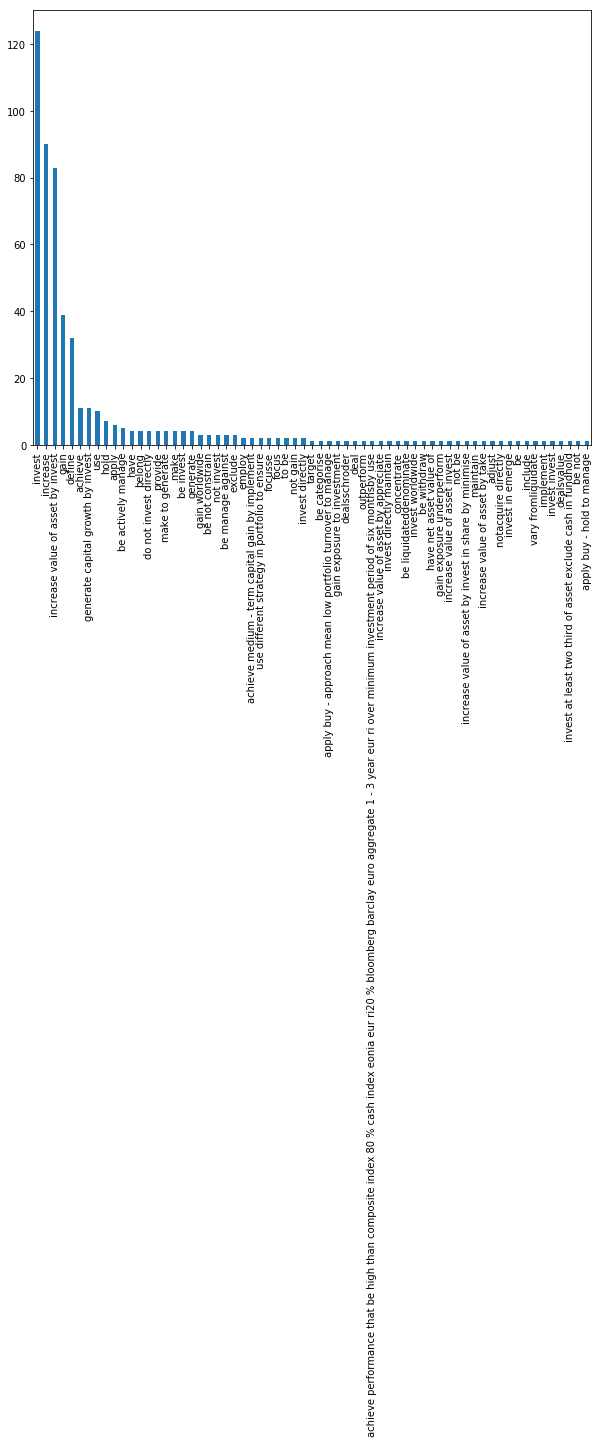

In [47]:
df_fund['new_relation'].value_counts().plot(kind="bar", figsize=(10, 8))

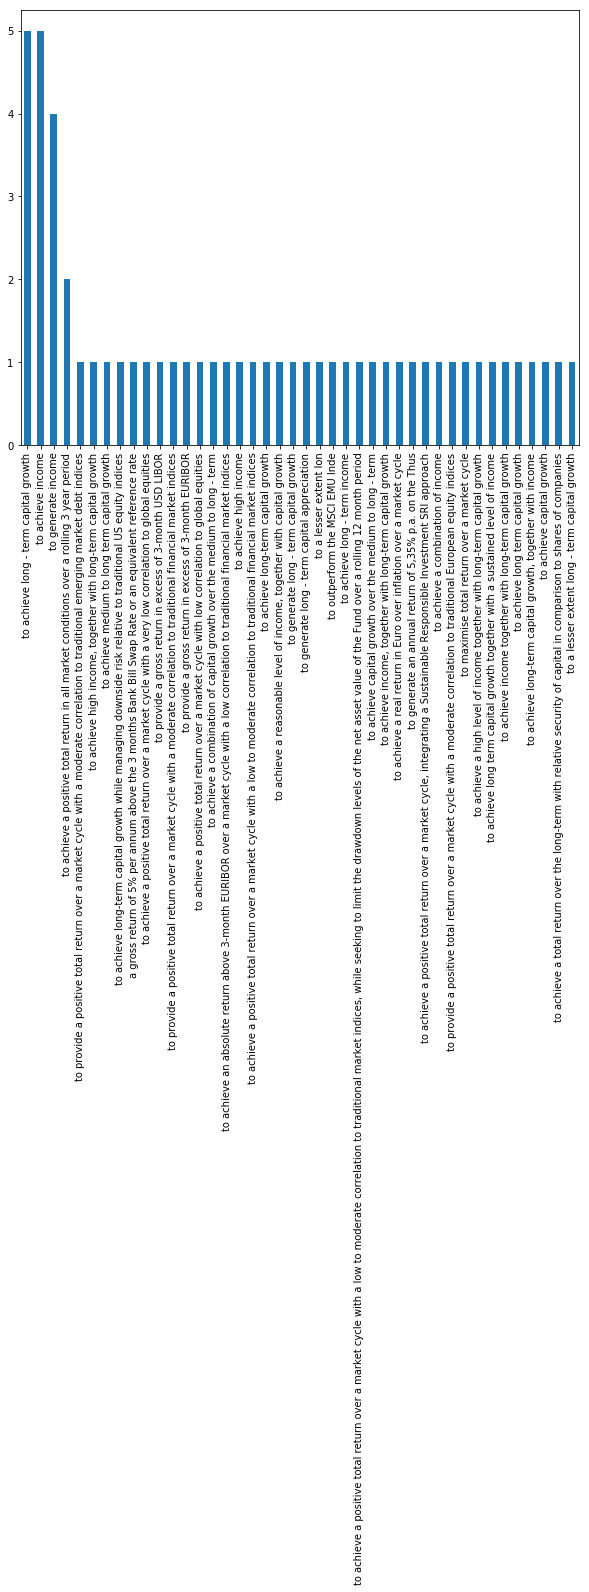

In [53]:
df_obj['argument 2'].value_counts().plot(kind="bar", figsize=(10, 8))

## Extract Concepts

In [168]:
df_include = kiid2rel.loc[(kiid2rel['new_relation'] == "include")|(kiid2rel['new_relation'] == "comprise")]
#np.logical_or
#df.loc[(df['First_name'] == 'Bill') | (df['First_name'] == 'Emma'), 'name_match'] = 'Match'
df_include

Unnamed: 0  id_sent  confidence  \
40            40   sent16    0.958237   
41            41   sent16    0.958237   
42            42   sent16    0.958237   
141          141   sent56    0.926623   
143          143   sent56    0.926623   
150          150   sent59    0.911178   
151          151   sent59    0.911178   
152          152   sent59    0.911178   
153          153   sent59    0.911178   
154          154   sent59    0.911178   
339          339  sent117    0.903040   
719          719  sent242    0.918080   
720          720  sent242    0.918080   
721          721  sent242    0.918080   
722          722  sent242    0.918080   
723          723  sent242    0.918080   
724          724  sent242    0.918080   
725          725  sent242    0.918080   
726          726  sent242    0.918080   
765          765  sent253    0.918080   
766          766  sent253    0.918080   
767          767  sent253    0.918080   
768          768  sent253    0.918080   
769          769  sent253    0.918080   
770          770  sent253    0.918080   
771          771  sent253    0.903040   
772          772  sent253    0.918080   
1114        1114  sent364    0.951914   
1115        1115  sent364    0.951914   
1116        1116  sent364    0.925061   
1117        1117  sent364    0.925061   
1118        1118  sent364    0.925061   
1119        1119  sent364    0.925061   
1120        1120  sent364    0.925061   
1121        1121  sent364    0.925061   
1122        1122  sent364    0.925061   
1123        1123  sent364    0.925061   
1722        1722  sent567    0.932598   
2262        2262  sent761    0.732373   
2263        2263  sent761    0.885880   
2264        2264  sent761    0.885880   
2265        2265  sent761    0.885880   
2266        2266  sent761    0.885880   
2411        2411  sent818    0.914346   

                                                                                                                                                                                                     sentence  \
40                                                                 ASEAN countries currently comprise Singapore, Malaysia, Thailand, Indonesia, Brunei, The Philippines, Vietnam, Cambodia, Laos and Myanmar.   
41                                                                 ASEAN countries currently comprise Singapore, Malaysia, Thailand, Indonesia, Brunei, The Philippines, Vietnam, Cambodia, Laos and Myanmar.   
42                                                                 ASEAN countries currently comprise Singapore, Malaysia, Thailand, Indonesia, Brunei, The Philippines, Vietnam, Cambodia, Laos and Myanmar.   
141                                                                                                                         Debt instruments includes   debt instruments issued by companies and governments.   
143                                                                                                                         Debt instruments includes   debt instruments issued by companies and governments.   
150                                                           Energy transition themes include  renewable & transitional energy, energy efficiency, sustainable transport, green building and infrastructure.   
151                                                           Energy transition themes include  renewable & transitional energy, energy efficiency, sustainable transport, green building and infrastructure.   
152                                                           Energy transition themes include  renewable & transitional energy, energy efficiency, sustainable transport, green building and infrastructure.   
153                                                           Energy transition themes include  renewable & transitional energy, energy efficiency, sustainable transport, green building and infrastructure.   
154                                                           Energy t

In [169]:
df_include.columns = ["index", "id_sent", "confidence", "sentence", "extraction", "index", "argument 1", "relation", "argument 2", "argument 3", "argument 4", "argument 5", "isin", "new_relation"]

In [180]:
class_dict = {}
#df_include = kiid2rel.loc[kiid2rel['new_relation'] == "include"] #or "comprise" or "to include"]
concept = df_include.loc[:,"argument 1"]
#argument = df_include.iloc[:,8]
for c in concept:

    argument = df_include["argument 2"].loc[df_include['argument 1']==c]

    for a in argument:
        if c not in class_dict:
            class_dict[c] = []

            class_dict[c].append(a)
        else:

            class_dict[c].append(a)
#class_dict = dict(zip(concept, argument))


In [181]:
print(class_dict)

{'asean countries': ['Cambodia', 'Vietnam', 'Singapore', 'Cambodia', 'Vietnam', 'Singapore', 'Cambodia', 'Vietnam', 'Singapore'], 'debt instruments': ['debt instruments issued by governments', 'debt instruments issued by companies', 'debt instruments issued by governments', 'debt instruments issued by companies'], 'energy transition themes': ['renewable infrastructure', 'renewable green building', 'renewable sustainable transport', 'renewable energy efficiency', 'renewable & transitional energy', 'renewable infrastructure', 'renewable green building', 'renewable sustainable transport', 'renewable energy efficiency', 'renewable & transitional energy', 'renewable infrastructure', 'renewable green building', 'renewable sustainable transport', 'renewable energy efficiency', 'renewable & transitional energy', 'renewable infrastructure', 'renewable green building', 'renewable sustainable transport', 'renewable energy efficiency', 'renewable & transitional energy', 'renewable infrastructure',

In [183]:
concept_dict = {a:list(set(b)) for a, b in class_dict.items()}

In [184]:
print(concept_dict)

{'asean countries': ['Vietnam', 'Cambodia', 'Singapore'], 'debt instruments': ['debt instruments issued by companies', 'debt instruments issued by governments'], 'energy transition themes': ['renewable energy efficiency', 'renewable infrastructure', 'renewable & transitional energy', 'renewable sustainable transport', 'renewable green building'], 'structured debt': ['denominated in USD with an average maturity'], 'environmental markets': ['Energy Efficiency', 'Alternative Energy', 'Water Infrastructure & Technologies', 'Pollution Control', 'Sustainable Food', 'Waste Management & Technologies', 'Renewable & Alternative Energy, Energy Efficiency, Water Infrastructure & Technologies, Pollution Control, Waste Management & Technologies, Environmental Support Services, and Sustainable Food', 'Renewable', 'Environmental Support Services'], 'activities': ['Energy Efficiency', 'Alternative Energy', 'Water Infrastructure & Technologies', 'Pollution Control', 'Sustainable Food', 'Waste Management

### Construct a term-term matrix:
list of terms as rows and list of terms as column. for each term, calculate tfidf.


In [8]:

# list of terms per subfund

rel2matrix = []
for share_class in kiid2table.loc[:,"share class"]:
    rel_selected = list(prosp2terms.pilot[prosp2terms.subfund_list.str.contains(subfund)])
    prosp2term.append(term_selected)
print(prosp2term[0])


# string of terms

term_4_tfidf = [' '.join(word for word in text) for text in prosp2term]

/Users/airbooklea/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


['sub-fund', 'UCITS', 'UCIs', 'Investment objective', 'investments of the sub-fund', 'debt securities', 'floating-rate debt securities', 'transferable securities', 'directional', 'Investment policy', 'performance objective', 'absolute performance objective', 'allocation strategy', 'developed', 'asset allocation', 'directional positions', 'income securities', 'fixed-rate', 'basis points', 'commodities or real estate', 'standard deviation of returns', 'forward-looking statement', 'compliant', 'risky asset part', 'floating-rate', 'Derivatives', 'part of the portfolio', 'objective of the sub-fund', 'volatility of equities', 'risk fundamentals of the assets', 'diversified sub-fund targets volatility', 'volatility constraint', 'valuations and risk fundamentals', 'dynamically', 'absolute return diversified sub-fund targets', 'macro-economic', 'Governance', 'Investment Manager', 'annualized standard deviation', 'medium term', 'real estate', 'disciplined screening', 'macro-economic fundamentals

In [10]:
terms = [term for term in prosp2terms.loc[:,"pilot"]]

In [34]:

import gensim
model = gensim.models.Word2Vec(prosp2term, min_count=1)

In [36]:
print(model.similarity('UCITS', 'UCIs'))

0.99618936


/Users/airbooklea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
